<a href="https://colab.research.google.com/github/vaishnavimule/Forecast-PM2.5_ARIMA/blob/main/Forecast_PM2_5_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np

#Read Data

In [ ]:
df=pd.read_csv('/content/PM1.0(Jan-Apr-Aug).csv',parse_dates=True)
df=df.dropna()
#df.index_col = pd.to_datetime(df.DATE, errors='coerce')
df['DATE']= pd.to_datetime(df['DATE'])
df.set_index("DATE", inplace = True)
df.info()
#df1['Date']= pd.to_datetime(df['Date'])
print('Shape of data',df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1610 entries, 2020-04-10 16:27:17+00:00 to 2020-04-18 23:59:56+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Jan-20  1610 non-null   float64
 1   Apr-20  1610 non-null   float64
 2   Aug-20  1610 non-null   float64
dtypes: float64(3)
memory usage: 50.3 KB
Shape of data (1610, 3)


,Jan-20,Apr-20,Aug-20
DATE,,,
2020-04-10 16:27:17+00:00,24.99,8.82,0.84
2020-04-10 16:34:39+00:00,26.82,9.13,2.05
2020-04-10 16:42:01+00:00,25.81,9.39,1.88
2020-04-10 16:49:32+00:00,25.75,9.44,1.78
2020-04-10 16:57:00+00:00,26.02,9.00,1.85


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PM1.0(Jan-Apr-Aug).csv to PM1.0(Jan-Apr-Aug).csv


#Plot Your Data

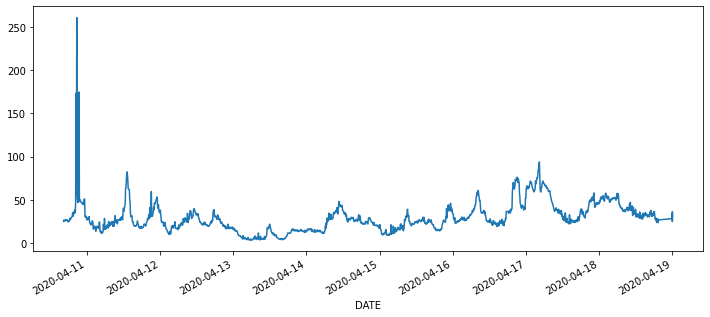

In [ ]:
df['Jan-20'].plot(figsize=(12,5))

#Check For Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['Jan-20'])

1. ADF :  -4.302026716953222
2. P-Value :  0.00044063622230645504
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1597
5. Critical Values :
	 1% :  -3.434451341329522
	 5% :  -2.863351500889469
	 10% :  -2.567734407591096


#Figure Out Order for ARIMA Model

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['Jan-20'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1610
Model:               SARIMAX(5, 1, 4)   Log Likelihood               -5431.195
Date:                Tue, 15 Jun 2021   AIC                          10882.389
Time:                        22:00:21   BIC                          10936.223
Sample:                             0   HQIC                         10902.374
                               - 1610                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9220      0.023    -39.603      0.000      -0.968      -0.876
ar.L2         -0.6122      0.029    -21.078      0.000      -0.669      -0.555
ar.L3         -0.4719      0.036    -13.066      0.000      -0.543      -0.401
ar.L4         -0.4537      0.040    -11.320      0.000      -0.532      -0.375
ar.L5         -0.3914      0.013    -30.665      0.000      -0.416      -0.366
ma.L1          0.2642      0.024     11.172      0.000       0.218       0.311
ma.L2          0.4200      0.018     23.901      0.000       0.386       0.454
ma.L3          0.1171      0.038      3.114      0.002       0.043       0.191
ma.L4         -0.0704      0.024     -2.910      0.004      -0.118      -0.023
sigma2        50.0015      0.258    193.529      0.000      49.495      50.508
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2019057.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                             5.98
Prob(H) (two-sided):                  0.00   Kurtosis:                       176.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#Split Data into Training and Testing

In [ ]:
print(df.shape)
train=df.iloc[:-90]
test=df.iloc[-90:]
print(train.shape,test.shape)
print(train.iloc[0],train.iloc[-1])
print(test.iloc[0],test.iloc[-1])
#print(test)

(1610, 3)
(1520, 3) (90, 3)
Jan-20    24.99
Apr-20     8.82
Aug-20     0.84
Name: 2020-04-10 16:27:17+00:00, dtype: float64 Jan-20    29.31
Apr-20    21.42
Aug-20     1.96
Name: 2020-04-18 13:03:03+00:00, dtype: float64
Jan-20    30.72
Apr-20    23.39
Aug-20     1.80
Name: 2020-04-18 13:10:25+00:00, dtype: float64 Jan-20    33.17
Apr-20    10.57
Aug-20     4.14
Name: 2020-04-18 23:59:56+00:00, dtype: float64


## Train the Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Jan-20'],order=(5,1,4))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Jan-20   No. Observations:                 1519
Model:                 ARIMA(5, 1, 4)   Log Likelihood               -5162.692
Method:                       css-mle   S.D. of innovations              7.237
Date:                Tue, 15 Jun 2021   AIC                          10347.385
Time:                        22:01:04   BIC                          10405.969
Sample:                             1   HQIC                         10369.196
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0027      0.084      0.032      0.974      -0.161       0.167
ar.L1.D.Jan-20    -0.9217      0.058    -15.851      0.000      -1.036      -0.808
ar.L2.D.Jan-20    -0.6165      0.069     -8.933      0.000      -0.752      -0.481
ar.L3.D.Jan-20    -0.4811      0.069     -6.993      0.000      -0.616      -0.346
ar.L4.D.Jan-20    -0.4561      0.060     -7.554      0.000      -0.574      -0.338
ar.L5.D.Jan-20    -0.3918      0.034    -11.592      0.000      -0.458      -0.326
ma.L1.D.Jan-20     0.2631      0.063      4.202      0.000       0.140       0.386
ma.L2.D.Jan-20     0.4300      0.057      7.537      0.000       0.318       0.542
ma.L3.D.Jan-20     0.1253      0.058      2.150      0.032       0.011       0.240
ma.L4.D.Jan-20    -0.0757      0.050     -1.507      0.132      -0.174       0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6584           -1.0494j            1.2389           -0.1608
AR.2            0.6584           +1.0494j            1.2389            0.1608
AR.3           -1.1658           -0.0000j            1.1658           -0.5000
AR.4           -0.6576           -0.9971j            1.1944           -0.3428
AR.5           -0.6576           +0.9971j            1.1944            0.3428
MA.1           -0.0279           -1.3380j            1.3383           -0.2533
MA.2           -0.0279           +1.3380j            1.3383            0.2533
MA.3           -1.9920           -0.0000j            1.9920           -0.5000
MA.4            3.7034           -0.0000j            3.7034           -0.0000
-----------------------------------------------------------------------------
"""

#Make Predictions on Test Set

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to cplot a graph
#df["Date"]= pd.to_datetime(df.["Date"])
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#print(index_future_dates)
#pred.index=index_future_dates
pred.index=df.index[start:end+1]
print(pred)
#pred.plot(legend=True)
#test['Apr-20'].plot(legend=True)


DATE
2020-04-18 13:10:25+00:00    28.795497
2020-04-18 13:17:45+00:00    27.105832
2020-04-18 13:25:05+00:00    30.501665
2020-04-18 13:32:29+00:00    30.554295
2020-04-18 13:39:54+00:00    30.253804
                               ...    
2020-04-18 23:59:56+00:00    29.928005
2020-04-18 23:59:56+00:00    29.930688
2020-04-18 23:59:56+00:00    29.933367
2020-04-18 23:59:56+00:00    29.936049
2020-04-18 23:59:56+00:00    29.938729
Name: ARIMA predictions, Length: 90, dtype: float64


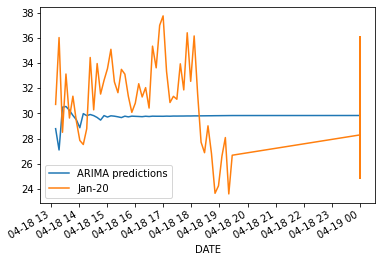

In [ ]:
pred.plot(legend='ARIMA Predictions')
test['Jan-20'].plot(legend=True)

In [ ]:
test['Jan-20'].mean()

30.352666666666654

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Jan-20']))
print(rmse)


3.3008602694499167


In [ ]:
model2=ARIMA(df['Jan-20'],order=(5,1,4))
model2=model2.fit()
df.tail()

,Jan-20,Apr-20,Aug-20
DATE,,,
2020-04-18 23:59:56+00:00,28.91,11.87,2.09
2020-04-18 23:59:56+00:00,30.83,12.07,3.47
2020-04-18 23:59:56+00:00,31.10,11.49,5.20
2020-04-18 23:59:56+00:00,36.09,11.56,7.19
2020-04-18 23:59:56+00:00,33.17,10.57,4.14


#For Future Dates

In [ ]:
#index_future_dates=pd.date_range(start='2020-04-18 23:59:56+00:00',end='2020-04-20 16:19:51+00:00')
#print(index_future_dates)
#print('Shape of data',index_future_dates.shape)
pred=model2.predict(start=len(df),end=len(df)+89,typ='levels').rename('ARIMA Predictions')
pred.index=df.index[start:end+1]
#print(comp_pred)
#pred.index=index_future_dates
print(pred)

DATE
2020-04-18 13:10:25+00:00    33.909236
2020-04-18 13:17:45+00:00    33.169555
2020-04-18 13:25:05+00:00    32.220275
2020-04-18 13:32:29+00:00    32.473469
2020-04-18 13:39:54+00:00    33.995981
                               ...    
2020-04-18 23:59:56+00:00    33.540905
2020-04-18 23:59:56+00:00    33.545576
2020-04-18 23:59:56+00:00    33.550244
2020-04-18 23:59:56+00:00    33.554915
2020-04-18 23:59:56+00:00    33.559584
Name: ARIMA Predictions, Length: 90, dtype: float64


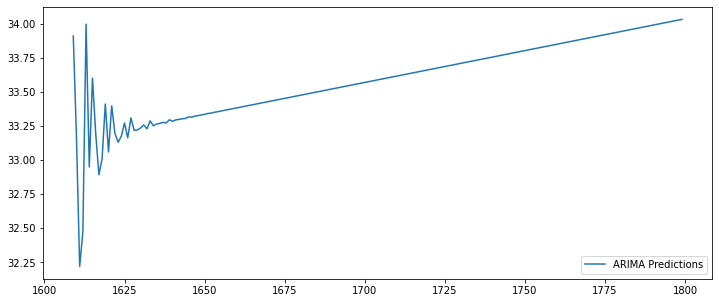

In [ ]:
pred.plot(figsize=(12,5),legend=True)
